# Neural Network with Sigmoid Activation function

In [2]:
import numpy as np

class NeuralNetwork:
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs
        self.weights = np.random.rand(3, 3)
        self.bias = np.random.rand(1)
        self.error_history = []
        self.epoch_list = []
        self.lr = 0.05
        
    def sigmoid(self, x, deriv = False):
        if deriv == True:
            return self.sigmoid_derivative(x)
        return 1/(1+np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x)*(1-self.sigmoid(x))
    
    def forward_propogation(self):
        self.hidden = self.sigmoid((np.dot(self.inputs, self.weights)+self.bias))
    
    def back_Propogation(self):
        self.error = self.hidden - self.outputs
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights -= self.lr * np.dot(self.inputs.T, delta)
    
    def train(self, epochs = 25000):
        for epoch in range(epochs):
            self.forward_propogation()
            self.back_Propogation()
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)
    
    def predict(self, new_input):
        prediction = self.sigmoid((np.dot(new_input, self.weights)+self.bias))
        return prediction

inputs = np.array([[0,0.1,0.2]]) # Independent Variable
outputs = np.array([[1, 1, 1]]) # Dependent variable

NN = NeuralNetwork(inputs, outputs)
NN.train(epochs=90000)

test = np.array([[0,0.1,0.2]])
print(NN.predict(test))

[[0.97776221 0.97767527 0.97791888]]


Text(0, 0.5, 'Loss')

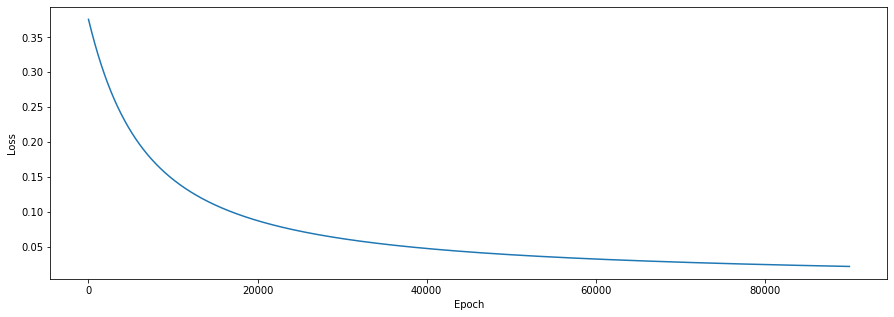

In [3]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')